# Solar Position Examples for pveducation.org
mainly uses the sun module

Do the normal imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import photovoltaic as pv

The solar position calculation uses on the pveducation site are approximations. More accurate calculations are in pvlib

In [3]:
print('declination',pv.sun.declination(1))
print('Equation of time (min): ', pv.sun.equation_of_time(1))
print('Time Correction (min): ', pv.sun.time_correction(-3.71,140, 10))
print('Elevation, Azimuth (degrees): ', pv.sun.elev_azi(-23.0116367279, -34, 13.27))
print('Sun Azimuth and Elevation (degrees)', pv.sun.sun_position(1, -34, 140, 10, 14, 0))
print('Sunrise, Sunset (hours)', pv.sun.sun_rise_set(-34, -23.0116367279, -43.71))
print('Direct light on a module (fraction)', pv.sun.module_direct(94.7078, 36.9758, 0, 45))

declination -23.011636727869238
Equation of time (min):  -3.705178323396069
Time Correction (min):  -43.71
Elevation, Azimuth (degrees):  (70.03071775789097, 298.3977969528565)
Sun Azimuth and Elevation (degrees) (70.01342676739516, 298.35884675563125)
Sunrise, Sunset (hours) (5.618703268603117, 19.838296731396884)
Direct light on a module (fraction) 0.3789451951482587


# Comparision of Declination Angle Formula

There are a variety of formula for declination angle. They all give approximately the same results.

declination (degrees) at day 263
0.20183407703974532 0.3027464429589782 0.20183407703974995 0.8631938355317079


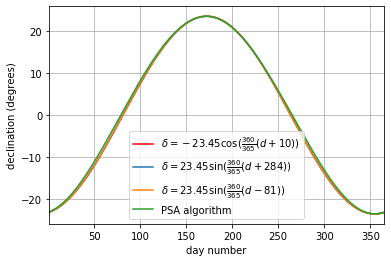

In [4]:
def declinationPSA(dayNo):
    '''converted from C++ code at www.psa.es/sdg/sunpos.htm Please check website for latest code'''
    dElapsedJulianDays = dayNo
    dOmega = 2.1429 - 0.0010394594 * dElapsedJulianDays
    dMeanLongitude = 4.8950630 + 0.017202791698 * dElapsedJulianDays  # Radians
    dMeanAnomaly = 6.2400600 + 0.0172019699 * dElapsedJulianDays
    dEclipticLongitude = dMeanLongitude + 0.03341607 * np.sin(dMeanAnomaly) + 0.00034894 * np.sin(
        2 * dMeanAnomaly) - 0.0001134 - 0.0000203 * np.sin(dOmega)
    dEclipticObliquity = 0.4090928 - 6.2140e-9 * dElapsedJulianDays + 0.0000396 * np.cos(dOmega)
    dSin_EclipticLongitude = np.sin(dEclipticLongitude)
    dDeclination = np.arcsin(np.sin(dEclipticObliquity) * dSin_EclipticLongitude)
    return (np.degrees(dDeclination))


dayNo = 263

dec1 = 23.45 * pv.sind(360 / 365 * (dayNo + 284))
dec2 = -23.45 * pv.cosd(360 / 365 * (dayNo + 10))
dec3 = 23.45 * pv.sind(360 / 365 * (dayNo - 81))
dec4 = declinationPSA(dayNo)

print('declination (degrees) at day ' + str(dayNo))
print(dec1, dec2, dec3, dec4)

dayNo = np.linspace(0, 365, 365)  # day number from 1 to 365

dec1 = 23.45 * pv.sind(360 / 365 * (dayNo + 284))
dec2 = -23.45 * pv.cosd(360 / 365 * (dayNo + 10))
dec3 = 23.45 * pv.sind(360 / 365 * (dayNo - 81))
dec4 = declinationPSA(dayNo)

plt.xlabel('day number')
plt.ylabel('declination (degrees)')
plt.xlim(1, 365)
plt.grid(True)
plt.plot(dayNo, dec1, label=r'$\delta=-23.45 \cos(\frac{360}{365}(d+10))$', color='r')
plt.plot(dayNo, dec2, label=r'$\delta=23.45 \sin(\frac{360}{365}(d+284))$')
plt.plot(dayNo, dec3, label=r'$\delta=23.45 \sin(\frac{360}{365}(d-81))$')
plt.plot(dayNo, dec4, label='PSA algorithm')
plt.legend(loc='lower center')
plt.savefig('plot_declination.png')
plt.show()
